# This script contains: 

## 1. Import libraries
## 2. Import data
## 3. Prep data for supervised algorithm
    3.1 Drop unnecessary columns
    3.2 Define X and y variables
    3.3 Split into test and training datasets
## 4. Decision Tree
    4.1 Plotting the decision tree
    4.2 Checking accuracies
    4.3 Confusion matrix

## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

## 2. Import data

In [2]:
# Create path
path = r'C:\Users\ashle\Documents\10-2024 Climate Analysis'

In [5]:
# Import scaled weather station data
df_scaled = pd.read_pickle(os.path.join(path, 'Data Sets', 'weather-prediction-dataset_scaled.pkl'))

In [7]:
# Import 'answers' data set
answers = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [9]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [11]:
df_scaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE,MONTH
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,1.317965,0.660721,-0.348893,-0.268791,-0.927601,-0.667864,-1.158624,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.02373,1.864672,-0.008724,-1

In [13]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Missing columns from 'answers': GDANSK ROMA TOURS

## 3. Prep data for supervised algorithm

### 3.1 Drop unnecessary columns

In [18]:
df_scaled.shape

(22950, 170)

In [20]:
# Drop columns in scaled data set to align with the 'answers' dataframe. 

def drop_specific_columns(df):
    # List of substrings to check for in column names
    substrings = ['GDANSK_', 'ROMA_', 'TOURS_']
    
    # Filter out columns containing the any of the substrings
    columns_to_drop = [col for col in df.columns if any(sub in col for sub in substrings)]

    # Drop the identified columns and return the modified DataFrame
    df = df.drop(columns=columns_to_drop)
    return df

In [22]:
# Apply function to scaled dataframe
df_scaled = drop_specific_columns(df_scaled)

In [24]:
# Compare df shape after dropping columns
df_scaled.shape

(22950, 149)

In [26]:
df_scaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE,MONTH
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.02373,1.864672,-0.008724,-1.203514,-0.406430,-1.149211,-1.370824,-1.125110,-1.578385,0.703568,2.336053,0.267752,-1.043873,-1.052433,0.252496,-0.810834,-0.097084,0.382899,-0.387967,0.855172,-1.419038,1.887115,1.149046,-1.423735,-0.315682,-1.521762,-0.988280,-0.877723,-1.044732,-0.093824,-0.746542,-1.244144,-0.282933,-0.30647,-1.098059,-0.265742,-0.505735,-0.350849,1.111743,0.816809,1.544023,-1.142400,-1.067870,1.925426,-0.470091,-1.018677,-0

In [28]:
# Drop DATE and MONTH columns from df_scaled
df_scaled = df_scaled.drop(columns = ['DATE', 'MONTH'])

In [30]:
# Check updated df_scaled dataframe
df_scaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.02373,1.864672,-0.008724,-1.203514,-0.406430,-1.149211,-1.370824,-1.125110,-1.578385,0.703568,2.336053,0.267752,-1.043873,-1.052433,0.252496,-0.810834,-0.097084,0.382899,-0.387967,0.855172,-1.419038,1.887115,1.149046,-1.423735,-0.315682,-1.521762,-0.988280,-0.877723,-1.044732,-0.093824,-0.746542,-1.244144,-0.282933,-0.30647,-1.098059,-0.265742,-0.505735,-0.350849,1.111743,0.816809,1.544023,-1.142400,-1.067870,1.925426,-0.470091,-1.018677,-0.186575,0.0

In [32]:
# Drop DATE column from 'answers' dataframe
answers = answers.drop(columns = ['DATE'])

In [34]:
# Check updated 'answers' dataframe
answers.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3.2 Define X and y variables

In [37]:
# Define X, y variables

X = df_scaled # Independent variable
y = answers # Dependent variable

In [39]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


### 3.3 Split into test and training datasets

In [42]:
# Split the data into two sets: a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=27)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16065, 147)
(6885, 147)
(16065, 15)
(6885, 15)


## 4. Decision Tree

### 4.1 Plotting the decision tree

[Text(0.3644006861861923, 0.9827586206896551, 'x[49] <= 0.403\ngini = 0.314\nsamples = 16065\nvalue = [[12139, 3926]\n[10495, 5570]\n[10872, 5193]\n[12955, 3110]\n[12627, 3438]\n[12633, 3432]\n[13435, 2630]\n[11634, 4431]\n[12736, 3329]\n[8949, 7116]\n[12718, 3347]\n[13602, 2463]\n[16065, 0]\n[13350, 2715]\n[15242, 823]]'),
 Text(0.06314092199782387, 0.9482758620689655, 'x[98] <= -0.216\ngini = 0.096\nsamples = 10082\nvalue = [[9481.0, 601.0]\n[8526.0, 1556.0]\n[8926.0, 1156.0]\n[10007.0, 75.0]\n[10082.0, 0.0]\n[9516.0, 566.0]\n[10016.0, 66.0]\n[9229.0, 853.0]\n[10022.0, 60.0]\n[7544.0, 2538.0]\n[9710.0, 372.0]\n[9853.0, 229.0]\n[10082.0, 0.0]\n[9858.0, 224.0]\n[9937.0, 145.0]]'),
 Text(0.019056435137895813, 0.9137931034482759, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7116\nvalue = [[6993.0, 123.0]\n[6485.0, 631.0]\n[6789.0, 327.0]\n[7102.0, 14.0]\n[7116.0, 0.0]\n[7077.0, 39.0]\n[7099.0, 17.0]\n[6921.0, 195.0]\n[7098.0, 18.0]\n[7116.0, 0.0]\n[6979.0, 137.0]\n[7086.0, 30.0]\n[7116.0, 0.

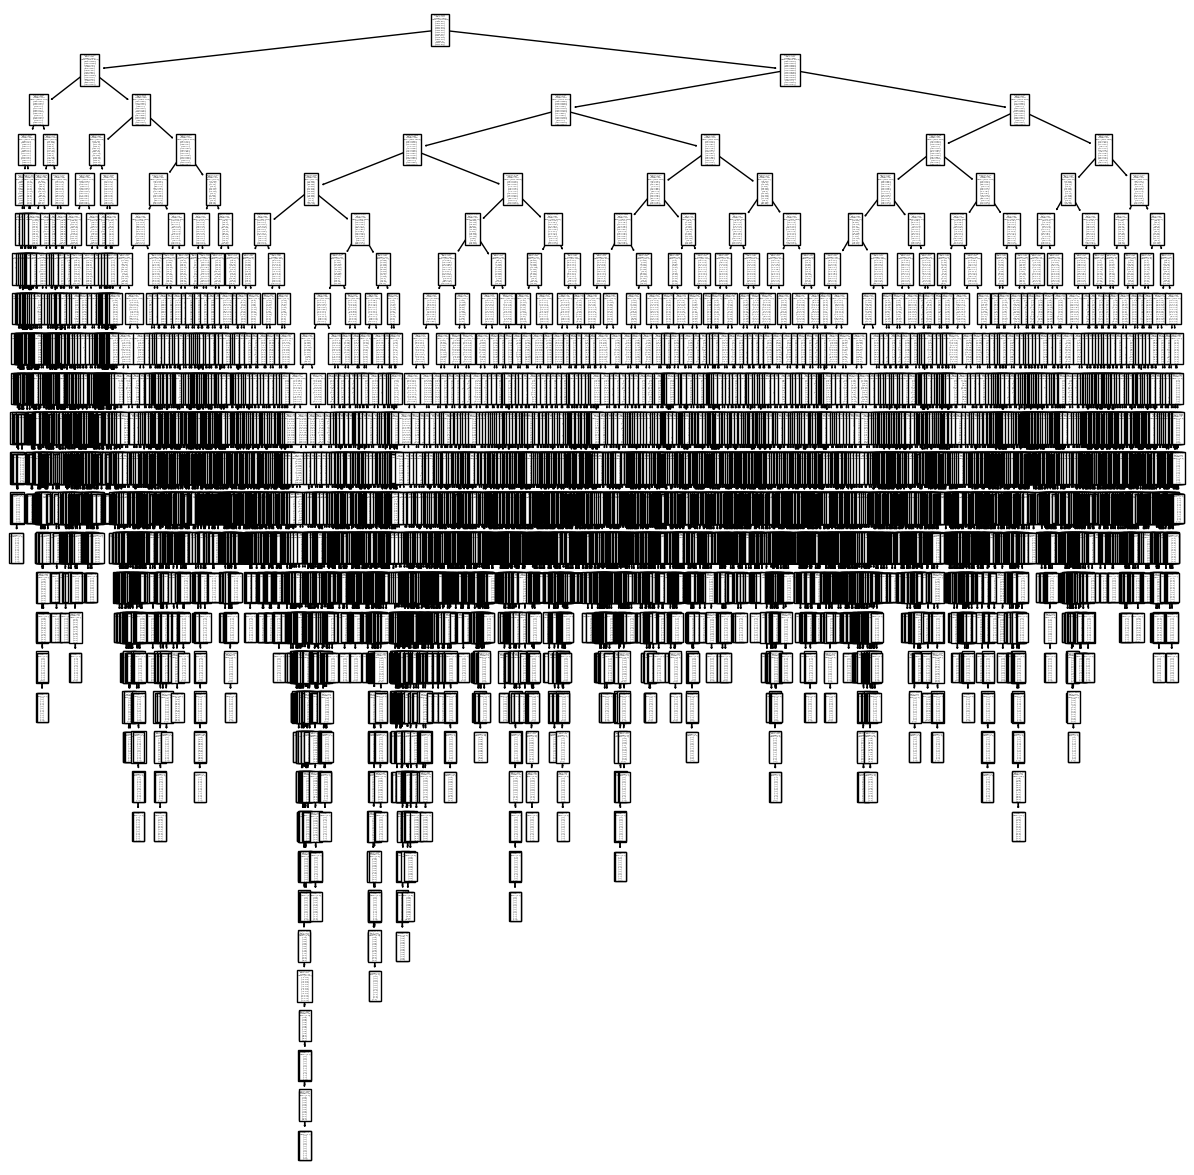

In [46]:
# Run the Decision Tree classifier

scaled_dt = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2) # Setting min_samples_split controls the minimum samples required to split a node
scaled_dt.fit(X_train, y_train)
figure(figsize = (15,15))
tree.plot_tree(scaled_dt)

### 4.2 Checking accuracies

In [49]:
from sklearn.metrics import classification_report

# Generate predictions on training and test sets
y_pred_train = scaled_dt.predict(X_train)
y_pred_test = scaled_dt.predict(X_test)

# Print classification reports for training and test sets
print("Training Set Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3926
           1       1.00      1.00      1.00      5570
           2       1.00      1.00      1.00      5193
           3       1.00      1.00      1.00      3110
           4       1.00      1.00      1.00      3438
           5       1.00      1.00      1.00      3432
           6       1.00      1.00      1.00      2630
           7       1.00      1.00      1.00      4431
           8       1.00      1.00      1.00      3329
           9       1.00      1.00      1.00      7116
          10       1.00      1.00      1.00      3347
          11       1.00      1.00      1.00      2463
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      2715
          14       1.00      1.00      1.00       823

   micro avg       1.00      1.00      1.00     51523
   macro avg       0.93      0.93      0.93 

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-package

**Does the decision tree need to be pruned?**

Not necessarily. Pruning is often used to reduce overfitting, but that doesn’t seem to be the main issue here. The model achieves 100% training accuracy and 88% test accuracy, showing a modest gap that might suggest slight overfitting. However, pruning would likely lower accuracy with limited benefit.

Most classes show strong F1-scores in the test set, indicating good generalization, except for Station 14 (Valentia), which has a notably lower F1-score. This suggests the model struggles specifically with this class. In an overfit model, we’d expect a much larger gap between training and test accuracy due to memorization rather than generalization. In this case, pruning may lead to a slight drop in accuracy without significantly changing test performance. Exploring other algorithms may be a better approach to capture patterns more effectively.

### 4.3 Confusion matrix

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


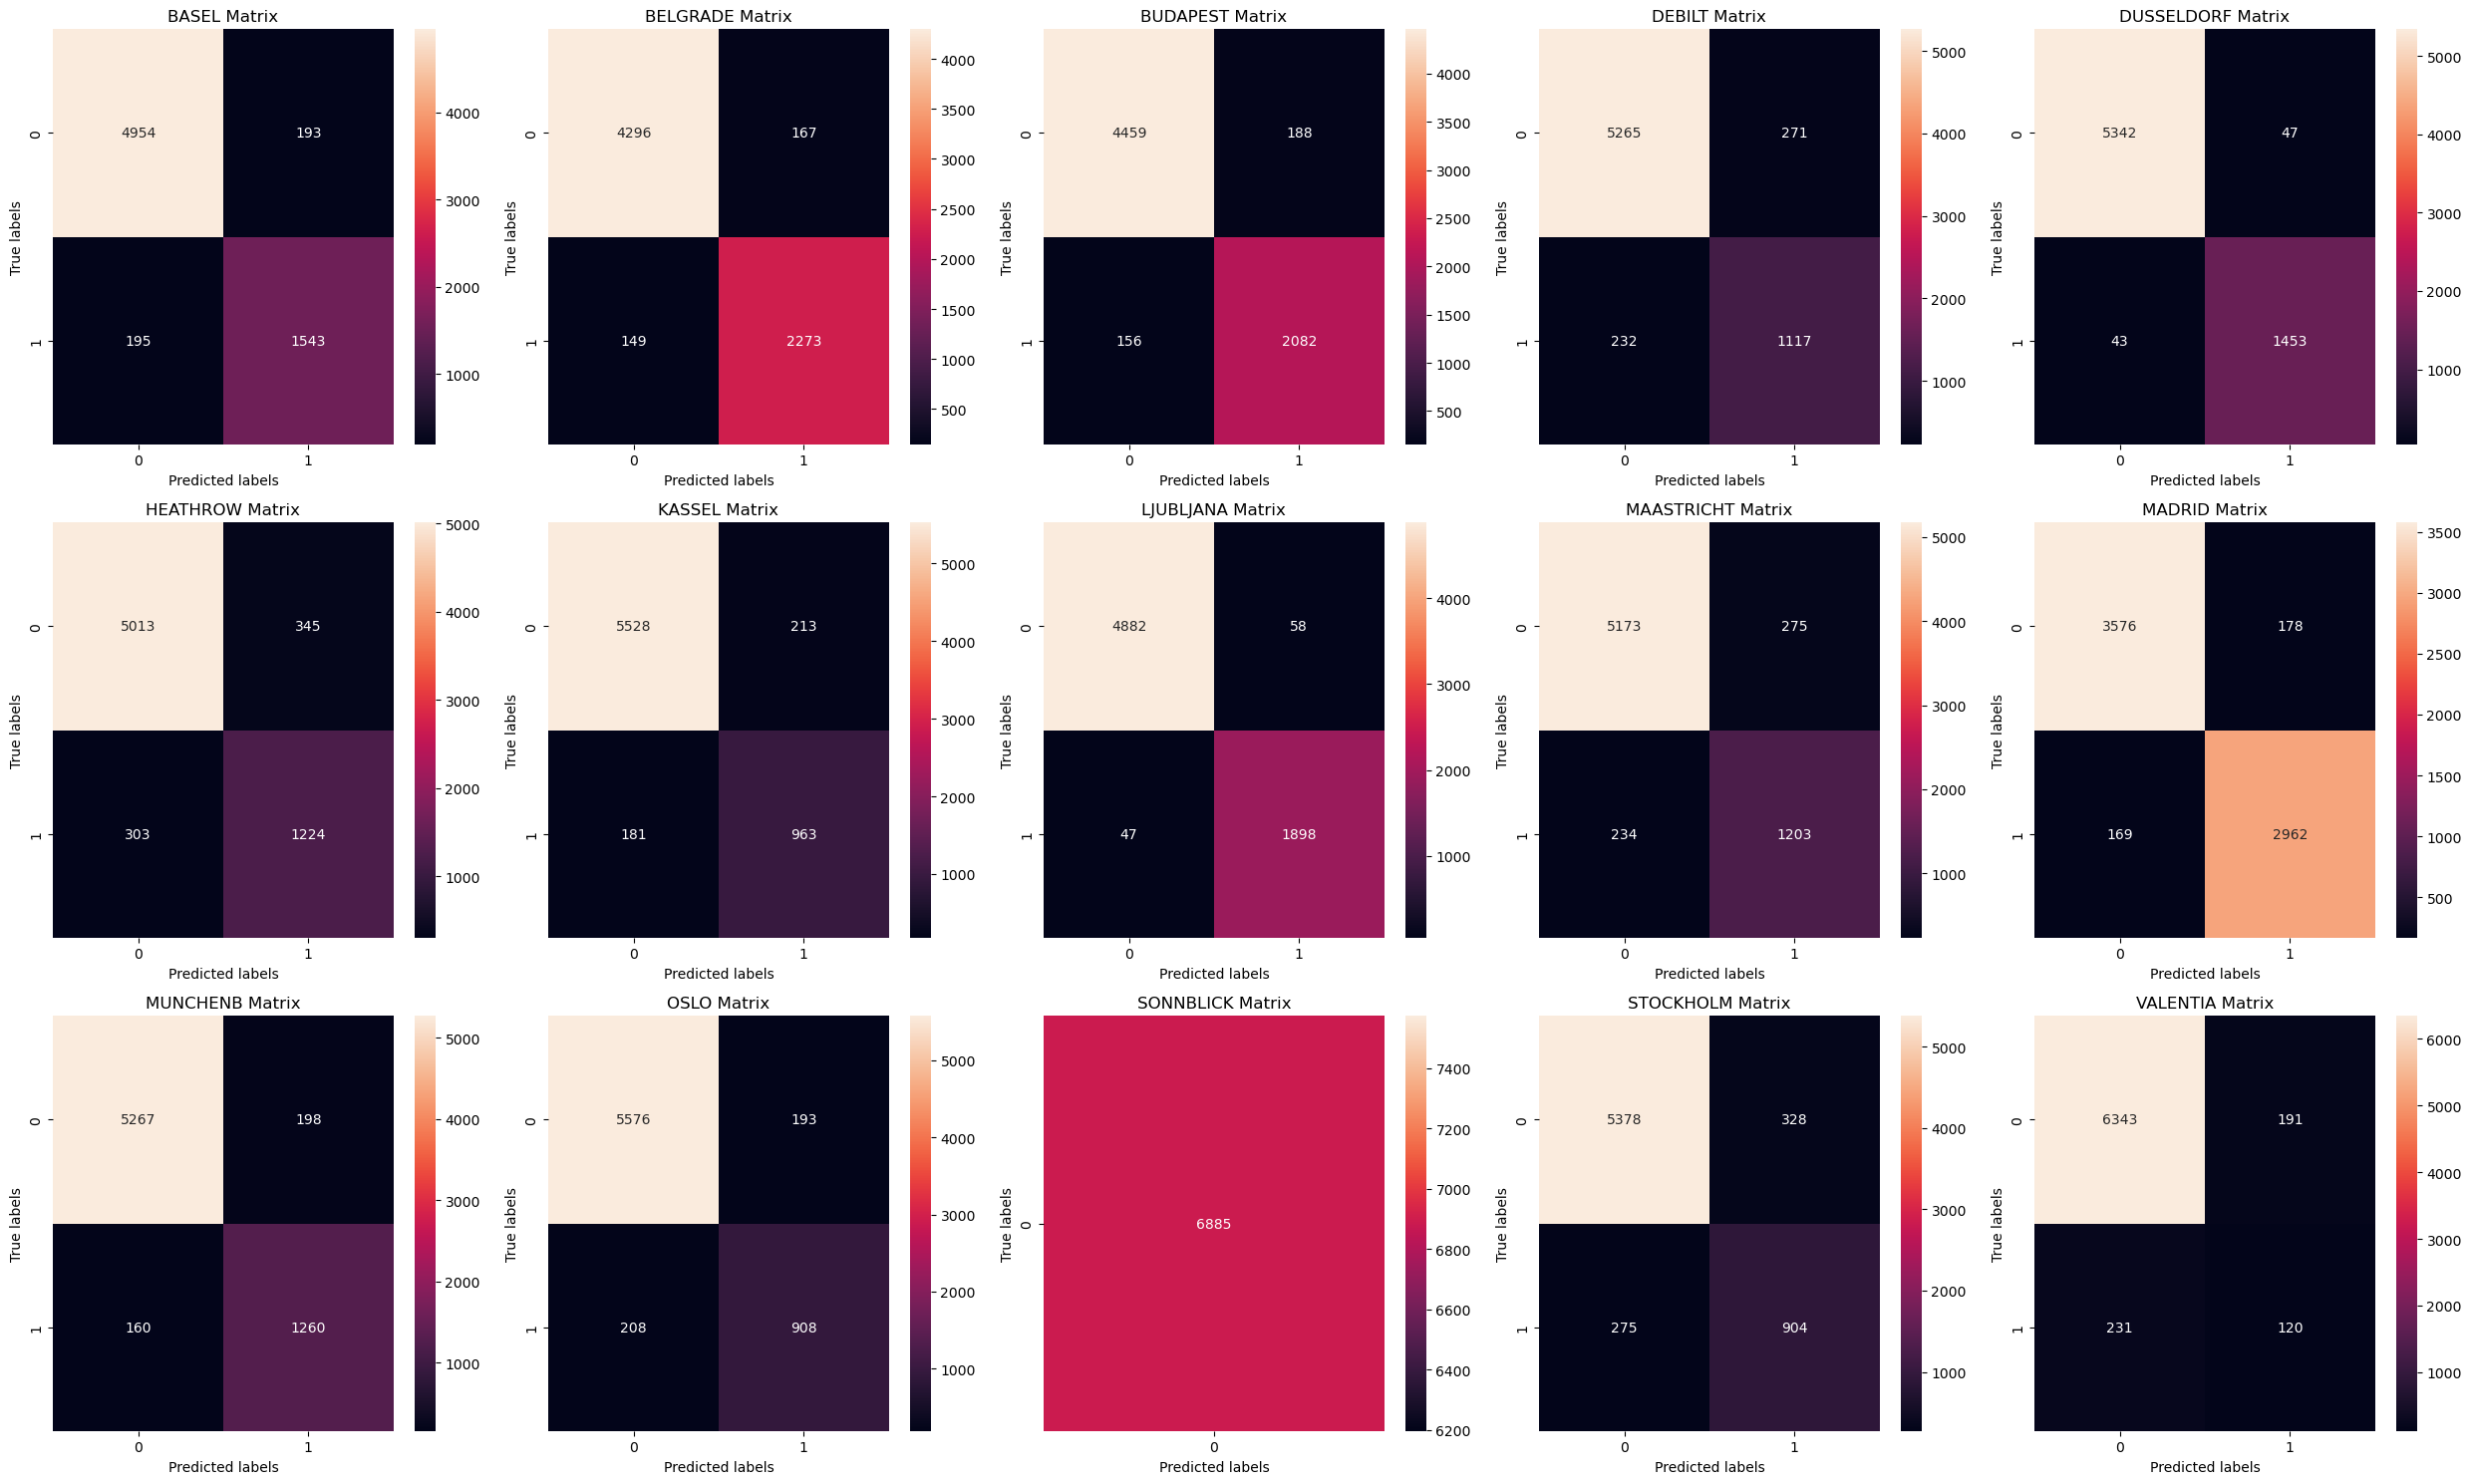

In [53]:
# Ensure your dataset's column names are properly referenced
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()

# Define key based on the label you're interested in (e.g., weather, categories, etc.)
key = "_pleasant_weather"

# Initialize variables for plotting
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']
count = 0

# Loop to create and plot confusion matrices for each location
for i in range(3):
    for j in range(5):
        name = locations[count]
        # Create confusion matrix for true vs predicted labels
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count])
        
        # Display confusion matrix using Seaborn heatmap
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        
        # Set labels, titles, and ticks for each subplot
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(f'{name} Matrix')
        count += 1

# Display the plot
plt.tight_layout()
plt.show()